# Chapter 3. Estimation

## The dice problem

A box holds 5 different-sided dice: a 4-sided, 6-sided, 8-sided, 12-sided, and 20-sided.

I select a single die, roll it, and get a 6. 

**Question:** What is the probability that I selected each die?

*Strategy:*

1. choose a representation for the hypothesis
2. choose a representation for the data
3. write the liklihood function

### Create a class for the calculations

First, I recreated the `Pmf` class from Chapter 2, renaming some of the attributes. I also took this as a chance to refamilliarize myself with the processes.

In [52]:
class Pmf:
    '''
    A class to define and maitain a probability mass function
    '''
    def __init__(self):
        self.hypotheses = dict()
    
    
    # sets the `hypo` to the probability `prob`
    def Set(self, hypo, prob):
        self.hypotheses[hypo] = prob
    
    
    # increments the object `hypo` by `n`
    # useful for building the PMF from an iterator
    def Incr(self, hypo, n):
        if obj in self.options.keys():
            self.hypotheses[hypo] += 1
        else:
            self.hypotheses[hypo] = 1
    
    
    # nromalize the PMF back to a sum of 1
    def Normalize(self):
        possible_hypos = sum(self.hypotheses.values())
        if possible_hypos > 0:
            for hypo in self.hypotheses.keys():
                self.hypotheses[hypo] = self.hypotheses[hypo] / possible_hypos
        else:
            print("No values set")
    
    
    # return the probability of hypothesis `hypo`
    def Prob(self, hypo):
        if obj in self.hypotheses.keys():
            print(self.hypotheses[hypo])
        else:
            print(hypo + "has not been set, yet")
    
    
    # multiply the current prob of object `hypo` by `new_p`
    def Mult(self, hypo, new_p):
        if hypo in self.hypotheses.keys():
            self.hypotheses[hypo] *= new_p
    
    
    # print statement
    def __str__(self):
        msg = ""
        for hypo in self.hypotheses.keys():
            msg = msg + str(hypo) + ': ' + str(self.hypotheses[hypo]) + '\n'
        return(msg)

The `Suite` class inherits from `Pmf` and is just a simple wrapper that creates the PMFs and updates them based on new data. 

In [53]:
class Suite(Pmf):
    '''
    Creating a Pmf for multiple hypotheses
    '''
    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
    
    
    # update the hypotheses using new data
    def Update(self, data):
        for hypo in self.hypotheses.keys():
            like = self.Liklihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()

Then, I create class `Dice` that inherits from `Suite` and `Pmf` and adds the `Liklihood()` method. The `Liklihood()` method calculates the liklihood of observing the data under the hypothesis. `Update()`, in the parent `Suite` class, runs each hypothesis through `Liklihood()` when new data is input.

In [54]:
class Dice(Suite):
    '''
    Which dice was chosen from the suite of possible die
    '''
    
    # calculate the liklihood of `data` under `hypo`
    def Liklihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

### Create the `Dice` object

I create an `Dice` object containing the possible die as the hypotheses.

In [55]:
suite = Dice([4, 6, 8, 12, 20])
print(suite)

4: 0.2
6: 0.2
8: 0.2
12: 0.2
20: 0.2



At the beginning, all die are equally likely to have been drawn. Now, I add the information from rolling a 6.

In [56]:
suite.Update(6)
print(suite)

4: 0.0
6: 0.3921568627450981
8: 0.2941176470588236
12: 0.19607843137254904
20: 0.11764705882352945



I then rolled the dice a few more times and updated my hypotheses.

In [57]:
# new rolls
new_rolls = [6, 8, 7, 7, 5, 4]
for roll in new_rolls:
    suite.Update(roll)

Now, the liklihoods are beginning to converge on the selected dice being 8-sided.

In [58]:
print(suite)

4: 0.0
6: 0.0
8: 0.9432484536722127
12: 0.055206128061290875
20: 0.0015454182664965536



What if I rolled a 9?

In [59]:
suite.Update(9)
print(suite)

4: 0.0
6: 0.0
8: 0.0
12: 0.9834812908813502
20: 0.016518709118649718



## The locomotive problem

### Define the problem

**Problem:** A railroad numbers its locomotives in order $1$ through $N$. One day, you see a locomotive with the number $60$. Estimate how many locotmotives the railroad has.

We cknow there are at least $60$ locomotives. To figure out how many more, we break the problem into two steps:

1. What did we know about $N$ before we saw the data (i.e. what is the *prior*)?
2. For any given value of N, what is the liklihood of seeing a locomotive with the number $60$ (i.e. *the likliood of seeing the data*)?

The prior is fairly arbitarary at this point. Downey begins by assuming that $N$ is likely to be somewhere between $1$ and $1,000$.

In [47]:
hypos = range(1, 1001)

We now claim that there is equal liklihood of seeing any of the trains, thus $1/N$.

### Create the `Train` class

In [60]:
class Train(Suite):
    '''
    How many trains are there?
    '''
    
    def Liklihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

### Estimate the number of trains

I created a `Train` object and then updated the hypotheses with the observation of seeing the locomotive number $60$.

In [61]:
suite = Train(hypos)
suite.Update(60)

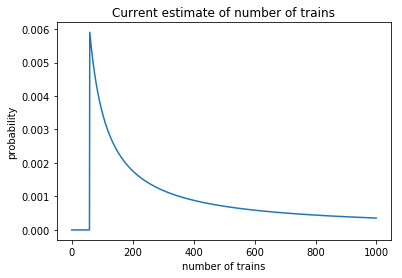

In [69]:
import matplotlib.pyplot as plt
plt.plot(suite.hypotheses.values())
plt.ylabel("probability")
plt.xlabel("number of trains")
plt.title("Current estimate of number of trains")
plt.show()

Understandably, the best choice is to guess $60$ as the answer can't be anything less, and it has the fewest possible number of trains. However, we could also suggest guessing the mean of the posterior probability.

In [71]:
# calculate the mean of the posterior of a Suite object `s`
def Mean(s):
    total = 0
    for hypo, prob in s.hypotheses.items():
        total += hypo * prob
    return total